In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [6]:
# The dataframe with our features only (picked 13 columns out of 15) to draw the heatmap
features_df = df.drop('Unnamed: 0', axis=1)
features_df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Data Visualization and Heatmap

<Axes: >

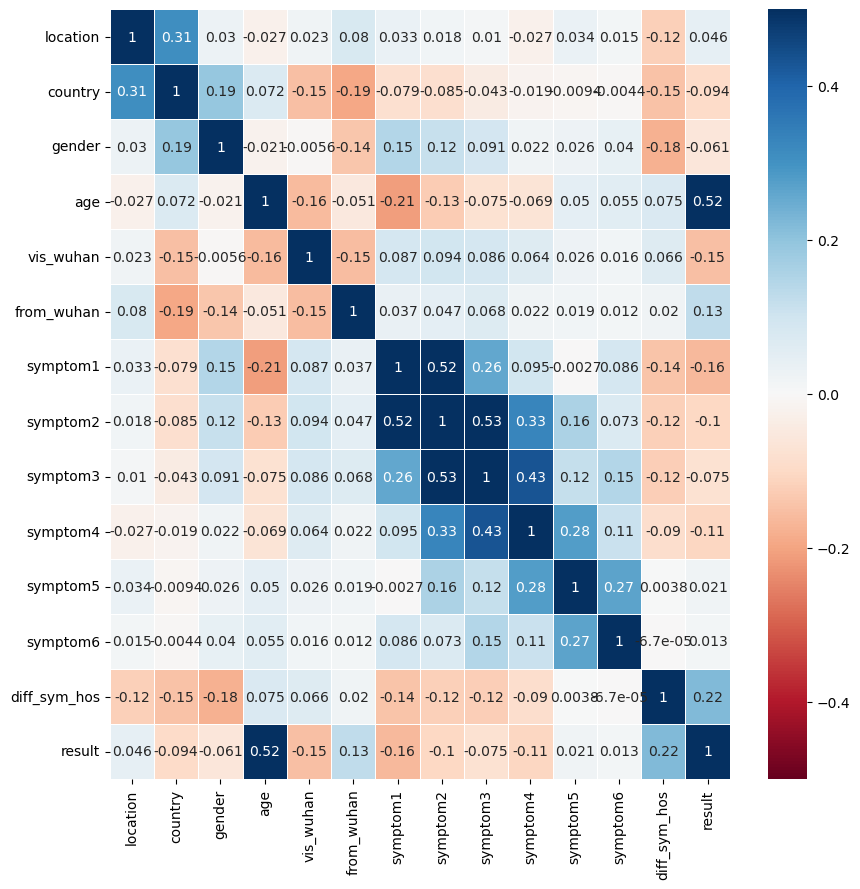

In [71]:
corrmatrix = features_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmatrix, cmap='RdBu', vmin=-0.5, vmax=0.5, linewidths=0.5, annot=True, ax= ax)

<function matplotlib.pyplot.show(close=None, block=None)>

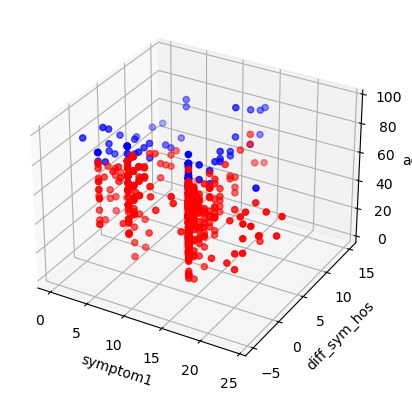

In [65]:
df.head()
real_df= df.drop('Unnamed: 0', axis=1)

class1_df = real_df[real_df["result"] == 0]
class2_df = real_df[real_df["result"] == 1]

# plotting a 4d scatter plot where the 4th dimension is represented with a different color, red = death
# blue = no death, 3d are: symptom3, country, age because of their strong correlation (check the heatmap)
fig1 = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig1.add_subplot(projection='3d') 
ax1.set_xlabel("symptom1")
ax1.set_ylabel("diff_sym_hos")
ax1.set_zlabel("age")
ax1.scatter3D(class1_df["symptom1"], class1_df["diff_sym_hos"], class1_df["age"], color="red")
ax1.scatter3D(class2_df["symptom1"], class2_df["diff_sym_hos"], class2_df["age"], color="blue")
plt.show

# Normal KNN Model

In [66]:
x = df.iloc[:,1:14].values
y = df.iloc[:,-1].values

In [67]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 20)


In [68]:
classifier= KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_val)  

# Validation

In [69]:
print("KNN Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred))
print("Precision:", metrics.precision_score(y_val , y_pred))
print("F1 score:",metrics.f1_score(y_val , y_pred))
print("Recall:", metrics.recall_score(y_val , y_pred))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred))

KNN Validation classifier results:
Accuracy: 0.9595375722543352
Precision: 0.9333333333333333
F1 score: 0.8
Recall: 0.7
ROC score: 0.8467320261437908


# Testing

In [70]:
y_pred2 = classifier.predict(x_test) 

In [71]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred2))
print("Precision:", metrics.precision_score(y_test , y_pred2))
print("F1 score:",metrics.f1_score(y_test , y_pred2))
print("Recall:", metrics.recall_score(y_test , y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred2))

KNN classifier results:
Accuracy: 0.9248554913294798
Precision: 0.8421052631578947
F1 score: 0.7111111111111111
Recall: 0.6153846153846154
ROC score: 0.7974882260596546


# ROC/AUC Curves

In [72]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

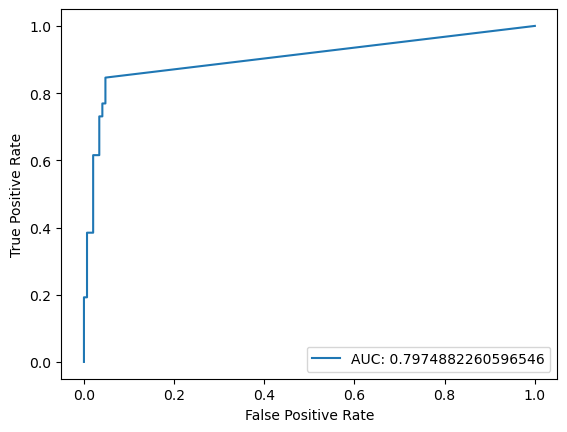

In [76]:
plt.plot(fpr,tpr, label="AUC: "+ str(metrics.roc_auc_score(y_test , y_pred2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Hyperparameters tunning

# Testing

In [74]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred))
print("Precision:", metrics.precision_score(y_test , y_pred))
print("F1 score:",metrics.f1_score(y_test , y_pred))
print("Recall:", metrics.recall_score(y_test , y_pred))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred))

KNN classifier results:
Accuracy: 0.7861271676300579
Precision: 0.13333333333333333
F1 score: 0.0975609756097561
Recall: 0.07692307692307693
ROC score: 0.4942438513867085


# Cross Validation

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
#print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
print(np.mean(cv_scores))

In [73]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i,).fit(x_train,y_train)
    yhat= knn.predictx_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97109827, 0.95953757, 0.95375723, 0.94797688, 0.96531792,
       0.94797688, 0.95953757, 0.94219653, 0.95953757, 0.94797688,
       0.95375723, 0.94219653, 0.95375723, 0.94797688, 0.95375723,
       0.94797688, 0.94797688, 0.93641618, 0.94219653, 0.93641618])

## Tunning

In [34]:
grid_params = { 'n_neighbors' : [3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [35]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [36]:
g_res.best_score_

0.9434782608695652

In [37]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

# SVM Model

In [93]:
svm_classifier = svm.SVC(kernel='linear', gamma=1, C=100)

# fitting the model with our train data
svm_classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)


In [94]:
print("SVM classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_svm))
print("Precision:", metrics.precision_score(y_test , y_pred_svm))
print("F1 score:",metrics.f1_score(y_test , y_pred_svm))
print("Recall:", metrics.recall_score(y_test , y_pred_svm))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_svm))

SVM classifier results:
Accuracy: 0.9248554913294798
Precision: 0.8421052631578947
F1 score: 0.7111111111111111
Recall: 0.6153846153846154
ROC score: 0.7974882260596546


# SVM Tuning

In [90]:
# defining parameter range

grid_params_svm = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(svm.SVC(), grid_params_svm, refit = True, verbose = 3)


In [65]:
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.935 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.935 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [66]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


# ROC, AUC curve for SVM

In [91]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

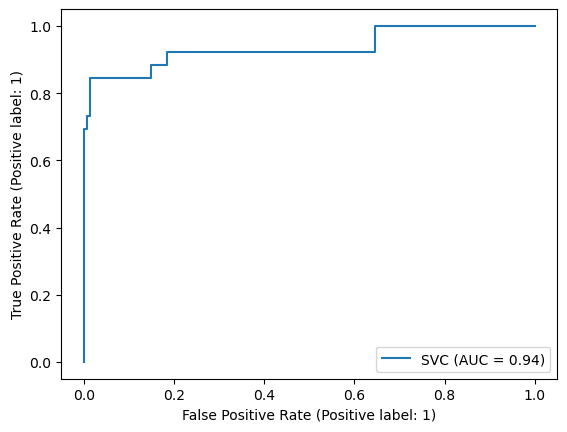

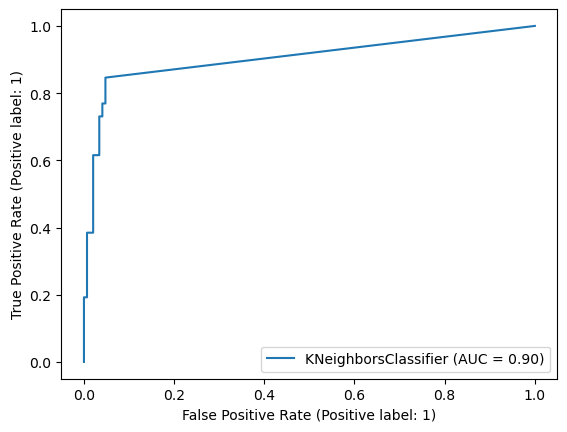

In [100]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svm_classifier, x_test, y_test)
knn_disp = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
plt.show()

# Bayes Classifier Model 1

In [121]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)
y_pred_bayes = gnb_classifier.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred_bayes).sum()))


Number of mislabeled points out of a total 173 points : 85


# Testing for Bayes Model 1

In [122]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_bayes))
print("Precision:", metrics.precision_score(y_test , y_pred_bayes))
print("F1 score:",metrics.f1_score(y_test , y_pred_bayes))
print("Recall:", metrics.recall_score(y_test , y_pred_bayes))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_bayes))

KNN classifier results:
Accuracy: 0.5086705202312138
Precision: 0.22429906542056074
F1 score: 0.3609022556390977
Recall: 0.9230769230769231
ROC score: 0.6792255363683936


# Tuning for Bayes Classifier

In [123]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.03511191734215131)


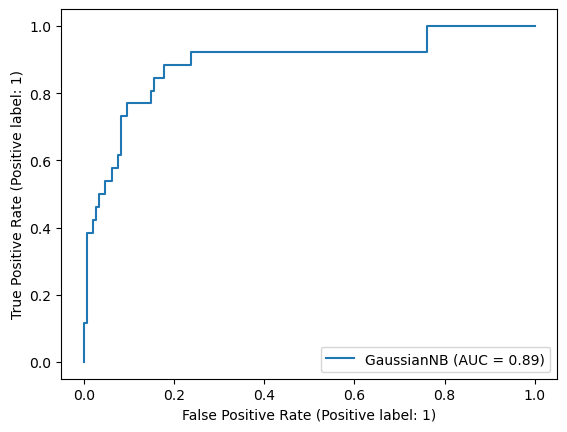

In [138]:
svc_disp = RocCurveDisplay.from_estimator(gnb_classifier, x_test, y_test)

# Enhanced model after tuning

In [134]:
gnb_classifier_enhanced = GaussianNB(var_smoothing=0.03511191734215131)
gnb_classifier_enhanced.fit(x_train, y_train)
y_pred_bayes_2 = gnb_classifier_enhanced.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred_bayes_2).sum()))

Number of mislabeled points out of a total 173 points : 20


# Testing for bayes classifier Model 2

In [136]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_bayes_2))
print("Precision:", metrics.precision_score(y_test , y_pred_bayes_2))
print("F1 score:",metrics.f1_score(y_test , y_pred_bayes_2))
print("Recall:", metrics.recall_score(y_test , y_pred_bayes_2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_bayes_2))

KNN classifier results:
Accuracy: 0.884393063583815
Precision: 0.8
F1 score: 0.4444444444444444
Recall: 0.3076923076923077
ROC score: 0.6470434327577185


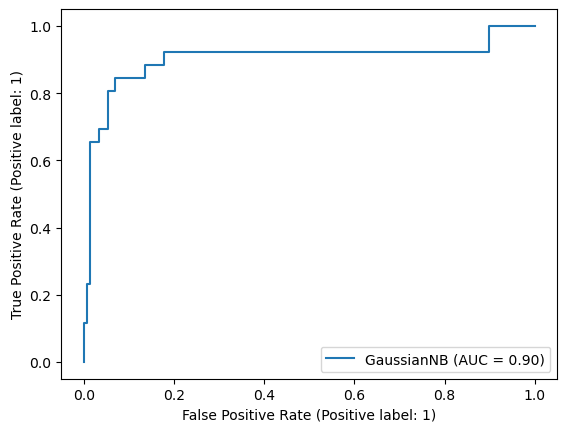

In [139]:
svc_disp = RocCurveDisplay.from_estimator(gnb_classifier_enhanced, x_test, y_test)